In [1]:
# run these commands on the server for setup
! git clone https://www.github.com/ildoonet/tf-pose-estimation
! cd tf-pose-estimation && python setup.py install  # Or, `pip install -e .`

! apt-get install swig && cd tf-pose-estimation/tf_pose/pafprocess && swig -python -c++ pafprocess.i && python3 setup.py build_ext --inplace

! git clone https://github.com/adamrehn/slidingwindow.git
! cd slidingwindow && python setup.py install

! wget -O tf-pose-estimation/models/graph/cmu/graph_opt.pb http://download692.mediafire.com/fol65zt9iwwg/qlzzr20mpocnpa3/graph_opt.pb

Cloning into 'tf-pose-estimation'...
remote: Enumerating objects: 1362, done.
remote: Total 1362 (delta 0), reused 0 (delta 0), pack-reused 1362
Receiving objects: 100% (1362/1362), 94.13 MiB | 45.21 MiB/s, done.
Resolving deltas: 100% (729/729), done.
--2020-03-25 07:50:32--  http://download2260.mediafire.com/pen6jjnogh1g/qlzzr20mpocnpa3/graph_opt.pb
Resolving download2260.mediafire.com (download2260.mediafire.com)... 199.91.155.1
Connecting to download2260.mediafire.com (download2260.mediafire.com)|199.91.155.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209299198 (200M) [application/octet-stream]
Saving to: ‘/content/tf-pose-estimation/models/graph/cmu/graph_opt.pb’

/content/tf-pose-es 100%[===================>] 199.60M  3.99MB/s    in 48s     

2020-03-25 07:51:20 (4.15 MB/s) - ‘/content/tf-pose-estimation/models/graph/cmu/graph_opt.pb’ saved [209299198/209299198]

running install
running bdist_egg
running egg_info
creating tf_pose.egg-info
writing tf_

In [2]:
import argparse
import sys
import time
import matplotlib.pyplot as plt
import os
import pandas as pd
from tqdm import tqdm_notebook
from tf_pose import common
import cv2
import numpy as np
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

import sys
sys.path.append('tf-pose-estimation/')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




In [3]:
! wget https://getfile.dokpub.com/yandex/get/https://yadi.sk/d/nWHh53OXDGoYqw
! unrar x nWHh53OXDGoYqw ./
! sudo rm nWHh53OXDGoYqw

--2020-03-25 07:51:58--  https://getfile.dokpub.com/yandex/get/https://yadi.sk/d/nWHh53OXDGoYqw
Resolving getfile.dokpub.com (getfile.dokpub.com)... 78.46.92.107
Connecting to getfile.dokpub.com (getfile.dokpub.com)|78.46.92.107|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://downloader.disk.yandex.ru/disk/ed38c865f086fb703e09109afedcd850a3151332b39ed427676ba9c368b57cae/5e7b45df/W1bfCUTmXCWhdha9dKeAEG5xDU-aNMnIvjh7YdAotldF4XdPUrXlCbK91QoMyflaeRO5tpBNric5XXCsJdtCgg%3D%3D?uid=0&filename=workout-movement-counting.rar&disposition=attachment&hash=wOCQY8KOzBsDRRoxcwDmhn9UtyRehuo3P6fJL7dr8IzpjC6cgdyw8mk7tz7vBMSpq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=application%2Fx-rar&owner_uid=210071618&fsize=51397642&hid=8a1bf3ae2c0624b0fd012d68494bec26&media_type=compressed&tknv=v2 [following]
--2020-03-25 07:51:59--  https://downloader.disk.yandex.ru/disk/ed38c865f086fb703e09109afedcd850a3151332b39ed427676ba9c368b57cae/5e7b45df/W1bfCUTmXCWh

In [236]:
args = {'video': 'videos/pushes.mp4',
        'model': 'cmu',
        'resize': '432x368',
        'resize_out_ratio': 2.0}

# loading OpenPose model
w, h = model_wh(args['resize'])
if w == 0 or h == 0:
    model = TfPoseEstimator(get_graph_path(args['model']), target_size=(432, 368));
else:
    model = TfPoseEstimator(get_graph_path(args['model']), target_size=(w, h));

[2020-03-25 09:03:20,257] [TfPoseEstimator] [INFO] loading graph from /usr/local/lib/python3.6/dist-packages/tf_pose-0.1.1-py3.6-linux-x86_64.egg/tf_pose_data/graph/cmu/graph_opt.pb(default size=432x368)
2020-03-25 09:03:20,257 INFO loading graph from /usr/local/lib/python3.6/dist-packages/tf_pose-0.1.1-py3.6-linux-x86_64.egg/tf_pose_data/graph/cmu/graph_opt.pb(default size=432x368)


TfPoseEstimator/Openpose/concat_stage7/axis
TfPoseEstimator/Mconv7_stage6_L2/biases
TfPoseEstimator/Mconv7_stage6_L2/weights
TfPoseEstimator/Mconv6_stage6_L2/biases
TfPoseEstimator/Mconv6_stage6_L2/weights
TfPoseEstimator/Mconv5_stage6_L2/biases
TfPoseEstimator/Mconv5_stage6_L2/weights
TfPoseEstimator/Mconv4_stage6_L2/biases
TfPoseEstimator/Mconv4_stage6_L2/weights
TfPoseEstimator/Mconv3_stage6_L2/biases
TfPoseEstimator/Mconv3_stage6_L2/weights
TfPoseEstimator/Mconv2_stage6_L2/biases
TfPoseEstimator/Mconv2_stage6_L2/weights
TfPoseEstimator/Mconv1_stage6_L2/biases
TfPoseEstimator/Mconv1_stage6_L2/weights
TfPoseEstimator/Mconv7_stage6_L1/biases
TfPoseEstimator/Mconv7_stage6_L1/weights
TfPoseEstimator/Mconv6_stage6_L1/biases
TfPoseEstimator/Mconv6_stage6_L1/weights
TfPoseEstimator/Mconv5_stage6_L1/biases
TfPoseEstimator/Mconv5_stage6_L1/weights
TfPoseEstimator/Mconv4_stage6_L1/biases
TfPoseEstimator/Mconv4_stage6_L1/weights
TfPoseEstimator/Mconv3_stage6_L1/biases
TfPoseEstimator/Mconv3_st

In [0]:
def captureCoords(model, args, offset=0, nonNullCounts=0, takeFrame = 5):

  '''
  Returns coordinates of body parts after applying pose estimation
  '''
  cap = cv2.VideoCapture(args['video'])
  ret, image = cap.read()
  frames = 0
  fullCoords = []
  image_h, image_w = image.shape[:2]
  imFrames = []
  while ret:
      ret, image = cap.read()

      t = time.time()
      if frames % takeFrame == 0 and frames >= offset:
        humans = model.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=args['resize_out_ratio'])
        allcords = list(np.zeros(((17+1)*2)))
        if len(humans) > 0:
          for substr in str(humans[0]).split('BodyPart:'):
            try:
              cat = int(substr.split('-')[0])
              li, ri = substr.index('('), substr.index(')')
              coords = substr[li+1:ri].split(', ')
              score = float(substr.split('score=')[-1])
              if score > 0.65:
                allcords[cat*2], allcords[cat*2 + 1] = float(coords[0])*image_w+0.5, float(coords[1])*image_h+0.5
            except:
              pass
        xs = np.asarray(allcords[::2])
        ys = np.asarray(allcords[1::2])

        # plt.imshow(image)
        imFrames.append(image)
        # plt.scatter(xs, ys)

        # plt.show()
        # a = input()
        fullCoords.append(allcords)
        elapsed = time.time() - t
      frames += 1
      if frames >= nonNullCounts+offset and nonNullCounts > 0:
        break

      if cv2.waitKey(0) & 0xFF == ord('q'):
          break

  # When everything is done, release the capture
  cap.release()
  cv2.destroyAllWindows()

  # Coordinates of each frame in the matrix
  return np.asarray(fullCoords), np.asarray(imFrames)

In [98]:
os.listdir('data/')

['pushes3.mp4',
 '.ipynb_checkpoints',
 'pushes_cut.mov',
 'videoplayback.mp4',
 'IMG_8426.MOV',
 'IMG_8267.MOV',
 'IMG_8266.MOV',
 'IMG_8425.MOV']

In [144]:
# capturing coordinates and gathering training dataset
takeFrame = 5
X = pd.DataFrame()
Y = pd.DataFrame()
for path in tqdm_notebook(os.listdir('data/')[3:4]):
  args['video'] = 'data/' + path
  videoTargets = pd.read_csv('csvs/' + path.split('.')[0] + '.csv')

  offset = int(videoTargets['frame'][0].split('.')[0])
  nonNullCounts = len(videoTargets['label'].dropna()) * takeFrame
  # run coordinate capture via OpenPose
  fullCoords, images = captureCoords(model, args, offset = offset, nonNullCounts=nonNullCounts, takeFrame = takeFrame)
  # generate features and append to the full dataset
  x = pd.DataFrame(fullCoords)
  X = pd.concat([x - x.shift(1).fillna(0), x.shift(1).fillna(0) - x.shift(2).fillna(0), x.rolling(window = 3).mean().fillna(0)], axis = 1)

  # append targets to the full label set
  y = videoTargets['label'].dropna().map(int)
  Y = pd.concat([Y, y], axis = 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [271]:
# capturing coordinates and gathering training dataset
takeFrame = 3
X = pd.DataFrame()
for path in tqdm_notebook(os.listdir('data/')[2:3]):
  args['video'] = 'data/' + path

  offset = 0
  nonNullCounts = 0
  # run coordinate capture via OpenPose
  fullCoords, images = captureCoords(model, args, offset = offset, nonNullCounts=nonNullCounts, takeFrame = takeFrame)
  # generate features and append to the full dataset
  x = pd.DataFrame(fullCoords)
  X = pd.concat([x - x.shift(1).fillna(0)], axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
DBSCAN?

In [275]:
km.labels_

array([-1, -1, -1, -1, -1,  0,  0,  0, -1, -1,  0,  0,  0, -1, -1, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
       -1,  0,  0, -1, -1, -1])

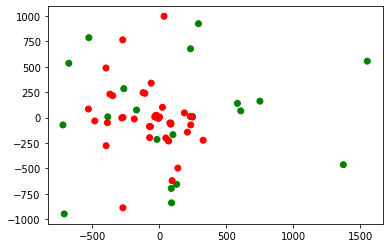

In [274]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
km = DBSCAN(eps = 5, min_samples=10)
pca = PCA(2)
data = pca.fit_transform(X)
km.fit(sc.fit_transform(X))
plt.scatter(data[:, 0], data[:, 1], c = pd.Series(km.labels_).map({-1: 'g', 0: 'r', 1: 'b', 2: 'y'}))

-1


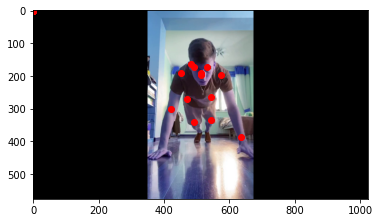

KeyboardInterrupt: ignored

In [277]:
for index,im in enumerate(images):
  print(km.labels_[index])

  xs = np.asarray(X.iloc[index, :36].values[::2])
  ys = np.asarray(X.iloc[index, :36].values[1::2])

  plt.scatter(xs, ys, c = 'r')
  plt.imshow(im)
  plt.show()
  a = input()

In [145]:
# sanity check
print(X.shape, Y.shape)

(70, 108) (70, 1)


In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


Xtr, Xval, ytr, yval = train_test_split(X, Y.values.reshape(-1), shuffle = False, train_size = 0.6)
classif = KNeighborsClassifier()
classif.fit(Xtr, ytr)
ypred = classif.predict(Xval)
print(accuracy_score(yval, ypred))

0.7857142857142857


## Count movements

In [0]:
def moveCount(labels):
    k = 0
    for i in range(1, len(labels)):
        if labels[i-1] == 0 and labels[i] == 1:
            k+=1
    return k

def createCompareDf(ypred, yreal):
  results = pd.DataFrame([ypred.astype(int), yreal.astype(int)]).T
  results.columns = ['pred', 'real']
  results.head(50)

  mcp, mcr = [0], [0]
  for i in range(1, results.shape[0]):
    mcp.append(moveCount(results.iloc[:i, 0].values))
    mcr.append(moveCount(results.iloc[:i, 1].values))

  results['moveCountPred'] = mcp
  results['moveCountReal'] = mcr
  return results

In [169]:
createCompareDf(ypred, yval).tail(10)

,pred,real,moveCountPred,moveCountReal
18,1,1,4,3
19,0,0,4,3
20,0,0,4,3
21,0,0,4,3
22,1,1,4,3
23,1,1,5,4
24,0,0,5,4
25,2,0,5,4
26,0,0,5,4
27,1,1,5,4


## Evaluation

In [0]:
labels = pd.read_csv('csvs/pushes3.csv').dropna()
labels['label'] = labels['label'].map(int)
offset = int(labels['frame'][0].split('.')[0])

In [0]:
args = {'video': 'data/pushes3.mp4',
        'model': 'cmu',
        'resize': '432x368',
        'resize_out_ratio': 4.0}

fullCoords, testImages = captureCoords(model, args, offset = offset, nonNullCounts=len(labels) * 5)

In [0]:
Xte = pd.DataFrame(fullCoords)
Xte = pd.concat([Xte - Xte.shift(1).fillna(0), Xte.shift(1).fillna(0) - Xte.shift(2).fillna(0), Xte.rolling(window = 3).mean().fillna(0)], axis = 1)
Xte = sc.transform(Xte)

In [171]:
# Prediction on test

ypred = classif.predict(Xte)
print(accuracy_score(labels['label'], ypred))

0.2571428571428571


In [172]:
results = pd.DataFrame([ypred.astype(int), labels['label'].values.astype(int)]).T
createCompareDf(ypred, labels['label'].values).head(40)

,pred,real,moveCountPred,moveCountReal
0,2,2,0,0
1,2,2,0,0
2,1,2,0,0
3,0,2,0,0
4,1,2,0,0
5,1,0,1,0
6,0,1,1,0
7,1,0,1,1
8,1,0,2,1
9,1,1,2,1


In [0]:
# dumping model
import pickle

filename = 'model.pkl'
pickle.dump(rfc, open(filename, 'wb'))